In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.duplicated().sum()

0

## Correlation Analysis 

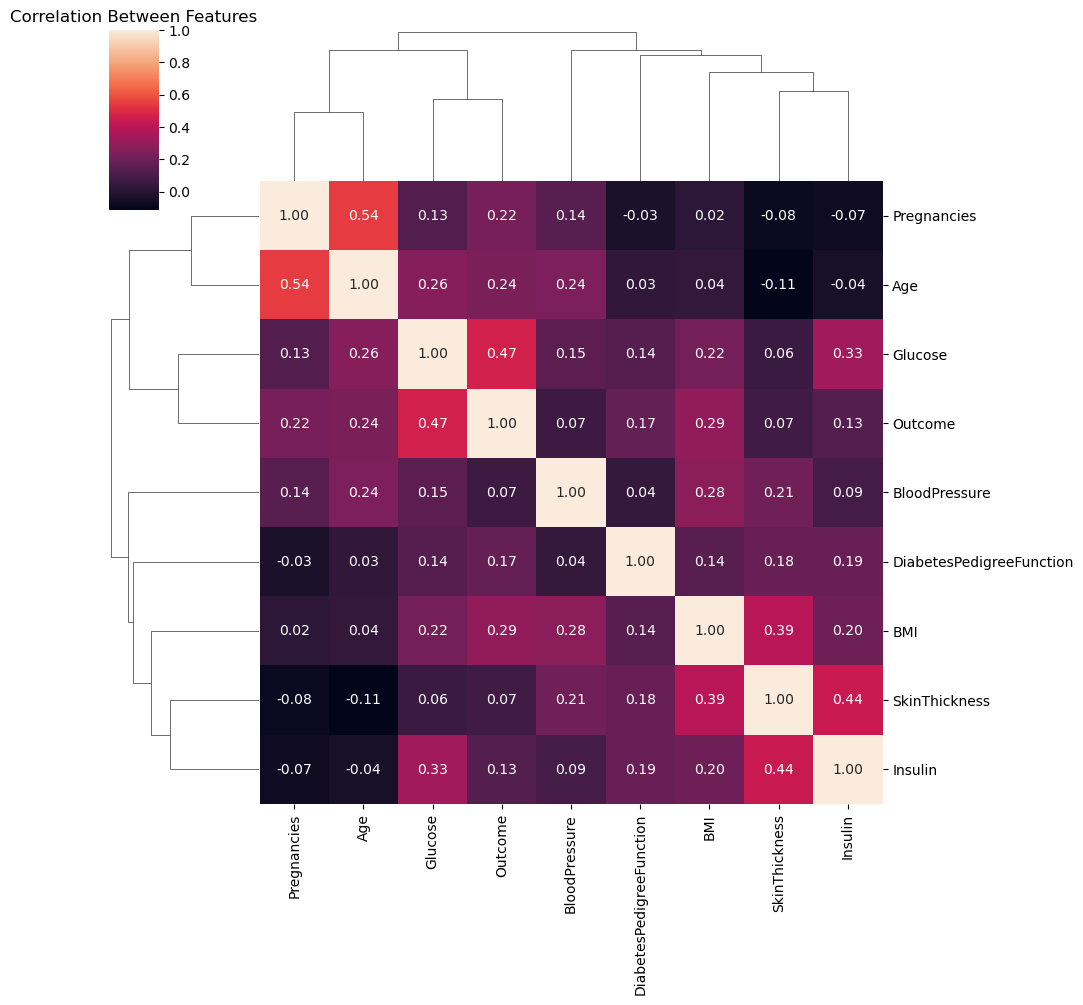

In [14]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create the clustermap
sns.clustermap(corr_matrix, annot=True, fmt=".2f")

# Set the title
plt.title("Correlation Between Features")

# Show the plot
plt.show()


In [8]:
x = df.iloc[:,:-1]
y = df['Outcome']

In [9]:
df.groupby(df['Outcome']).mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


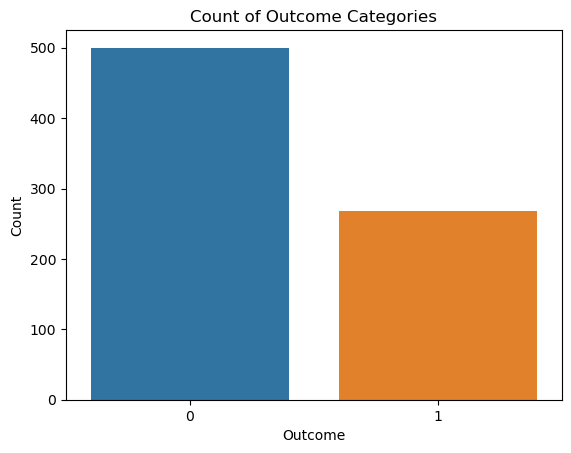

In [10]:
# Create the bar plot
sns.countplot(x='Outcome', data=df)

# Add labels and title
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Count of Outcome Categories')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Pregnancies vs diabetes')

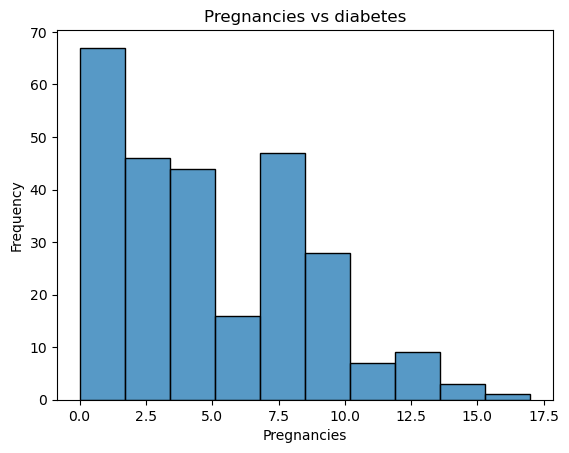

In [11]:
df_Pregnancies = df[df['Outcome'] == 1]
sns.histplot(df_Pregnancies['Pregnancies'])

plt.xlabel('Pregnancies')
plt.ylabel('Frequency')
plt.title('Pregnancies vs diabetes')

In [12]:
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

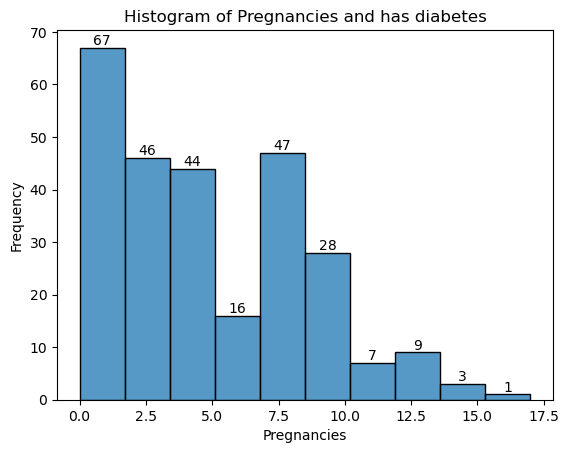

In [13]:
df_outcome_1 = df[df['Outcome'] == 1]

ax = sns.histplot(df_outcome_1['Pregnancies'])

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

# Add labels and title
plt.xlabel('Pregnancies')
plt.ylabel('Frequency')
plt.title('Histogram of Pregnancies and has diabetes')

# Show the plot
plt.show()

### Train Test Split 

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

### Standardization

In [16]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [17]:
x_train = scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)

# Logistic Regression

In [18]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [19]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [20]:
y_pred1 = model1.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, y_pred1)
print(score1)

0.796875


In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.73      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192



# SVM - Classification

In [23]:
from sklearn.svm import SVC
model2 = SVC()
model2.fit(x_train,y_train)

SVC()

In [24]:
y_pred2 = model2.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score
score2 = accuracy_score(y_test, y_pred2)
print(score2)

0.7760416666666666


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       130
           1       0.70      0.53      0.61        62

    accuracy                           0.78       192
   macro avg       0.75      0.71      0.72       192
weighted avg       0.77      0.78      0.77       192



# KNN Classification

In [27]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier()
model3.fit(x_train,y_train)

KNeighborsClassifier()

In [28]:
y_pred3 = model3.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score
score3 = accuracy_score(y_test, y_pred3)
print(score3)

0.796875


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       130
           1       0.70      0.65      0.67        62

    accuracy                           0.80       192
   macro avg       0.77      0.76      0.76       192
weighted avg       0.79      0.80      0.79       192



# Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier()
model4.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
y_pred4 = model4.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score
score4 = accuracy_score(y_test, y_pred4)
print(score4)

0.7239583333333334


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       130
           1       0.56      0.65      0.60        62

    accuracy                           0.72       192
   macro avg       0.69      0.70      0.70       192
weighted avg       0.74      0.72      0.73       192



# Random Forest - Classification

In [35]:
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier()
model5.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
y_pred5 = model5.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score
score5 = accuracy_score(y_test, y_pred5)
print(score5)

0.7864583333333334


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       130
           1       0.70      0.60      0.64        62

    accuracy                           0.79       192
   macro avg       0.76      0.74      0.75       192
weighted avg       0.78      0.79      0.78       192



# Naive Bayes - Classification

In [39]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB
model6 = GaussianNB()
model7 = BernoulliNB()

In [40]:
model6.fit(x_train,y_train)

GaussianNB()

In [41]:
y_pred6 = model6.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score
score6 = accuracy_score(y_test, y_pred6)
print(score6)

0.7395833333333334


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       130
           1       0.60      0.56      0.58        62

    accuracy                           0.74       192
   macro avg       0.70      0.69      0.70       192
weighted avg       0.74      0.74      0.74       192



In [44]:
model7.fit(x_train,y_train)

BernoulliNB()

In [45]:
y_pred7 = model7.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score
score7 = accuracy_score(y_test, y_pred7)
print(score7)

0.734375


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       130
           1       0.59      0.58      0.59        62

    accuracy                           0.73       192
   macro avg       0.70      0.69      0.69       192
weighted avg       0.73      0.73      0.73       192



# AdaBoost

In [48]:
from sklearn.ensemble import AdaBoostClassifier
model8 =  AdaBoostClassifier()
model8.fit(x_train,y_train)

AdaBoostClassifier()

In [49]:
y_pred8 = model8.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score
score8 = accuracy_score(y_test, y_pred8)
print(score8)

0.765625


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred8))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       130
           1       0.65      0.60      0.62        62

    accuracy                           0.77       192
   macro avg       0.73      0.72      0.73       192
weighted avg       0.76      0.77      0.76       192



# Gradient Boosting

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
model9 = GradientBoostingClassifier()
model9.fit(x_train,y_train)

GradientBoostingClassifier()

In [53]:
y_pred9 = model9.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score
score9 = accuracy_score(y_test, y_pred9)
print(score9)

0.7864583333333334


Text(0.5, 1.0, 'Model Scores')

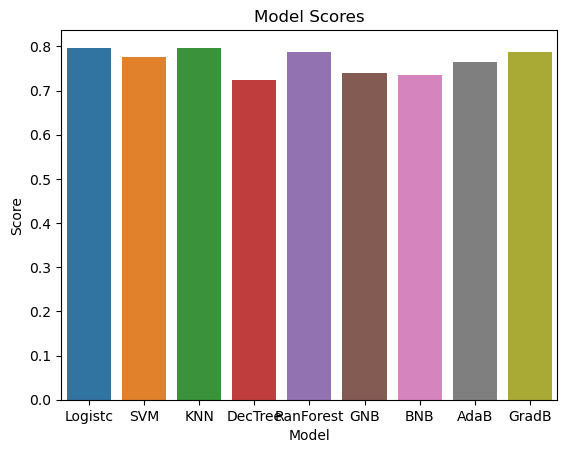

In [55]:
name = ['Logistc','SVM','KNN','DecTree','RanForest','GNB','BNB','AdaB','GradB']
score = [score1, score2, score3, score4, score5, score6, score7,score8,score9]

sns.barplot(x = name,y = score)


# Add labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Scores')


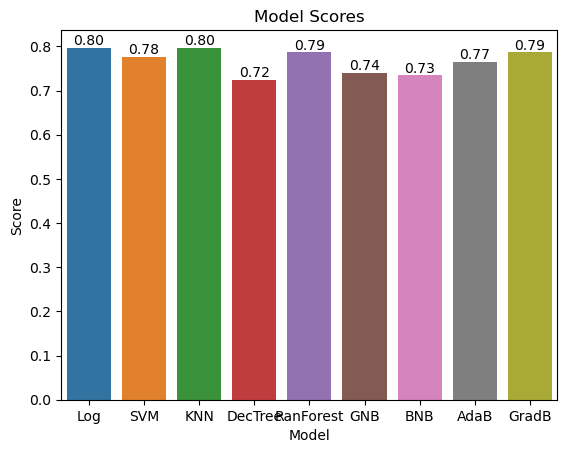

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
names = ['Log', 'SVM', 'KNN', 'DecTree', 'RanForest', 'GNB', 'BNB', 'AdaB', 'GradB']
scores = [score1, score2, score3, score4, score5, score6, score7, score8, score9]

# Create the seaborn bar plot
ax = sns.barplot(x=names, y=scores)

# Add score values on top of each bar
for i, score in enumerate(scores):
    ax.text(i, score, f'{score:.2f}', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Scores')

# Show the plot
plt.show()


In [57]:
df.iloc[1:3,:]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [58]:
new_val = (8,183,64,0,0,23.3,0.672,32)

new_val_reshaped = np.array(new_val).reshape(1, -1)

# Scale the reshaped input data
scal_new_val = scalar.transform(new_val_reshaped)

# Make predictions
output = model1.predict(scal_new_val)

if(output == 1) : 
    print("Diabetic")
else :
    print("Not Diabetic/Normal")

Diabetic


C:\Users\akhil\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
